<a href="https://colab.research.google.com/github/cricgok/OIBSIP/blob/main/car_prediction_with_different_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
car=pd.read_csv("/content/drive/MyDrive/CarPrice_Assignment.csv")

#  Descover Data

In [ ]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
car_copy=car.copy()

In [ ]:
car= car.drop("car_ID",axis=1)

In [ ]:
car_cor=car.corr()

<ipython-input-139-c3b9ddc5cd6f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_cor=car.corr()


In [ ]:
car_cor["price"]

symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [ ]:
# delet carheight stroke compressionratio peakrpm

In [ ]:
car=car.drop(["carheight","stroke","compressionratio","peakrpm"],axis=1)

In [ ]:
car_cor=car.corr()

<ipython-input-143-c3b9ddc5cd6f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car_cor=car.corr()


<Axes: >

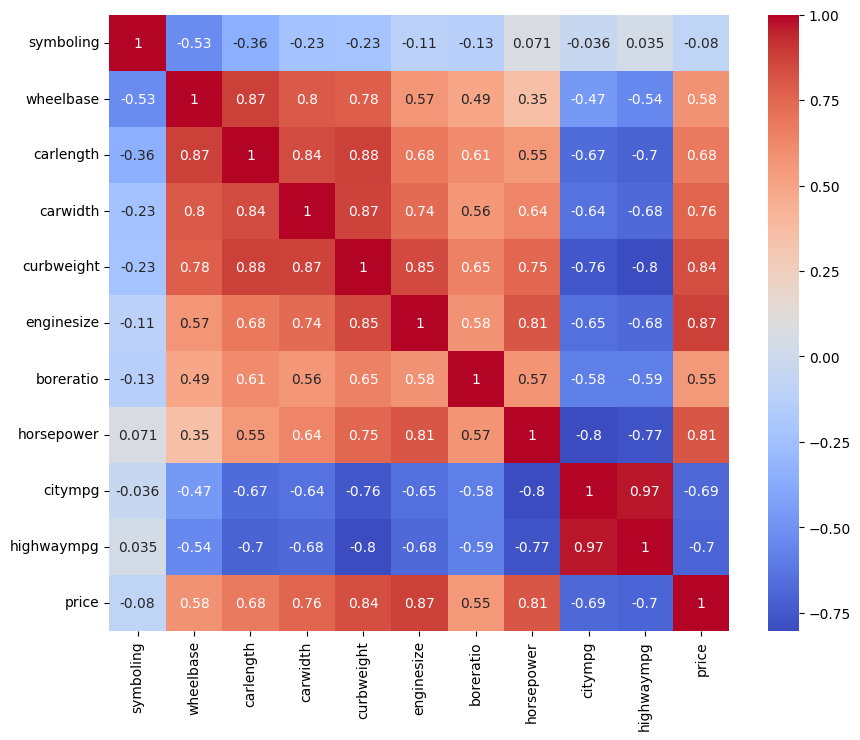

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(car_cor,annot=True,cmap = "coolwarm")

# Visulaization Data


In [ ]:
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0


Text(0.5, 1.0, 'symboling frequancy')

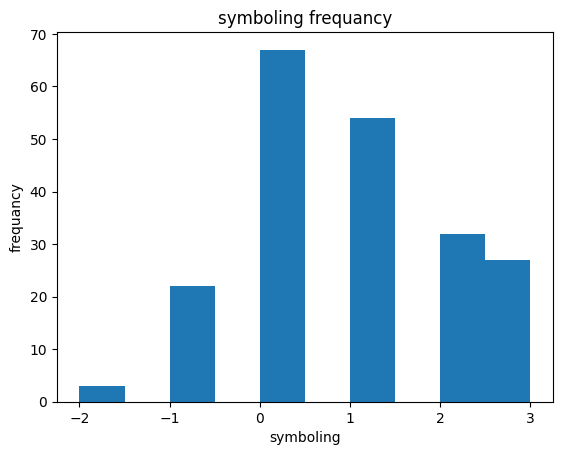

In [ ]:
plt.hist(car["symboling"])
plt.xlabel("symboling")
plt.ylabel("frequancy")
plt.title("symboling frequancy")

Text(0.5, 1.0, 'horsepower frequancy')

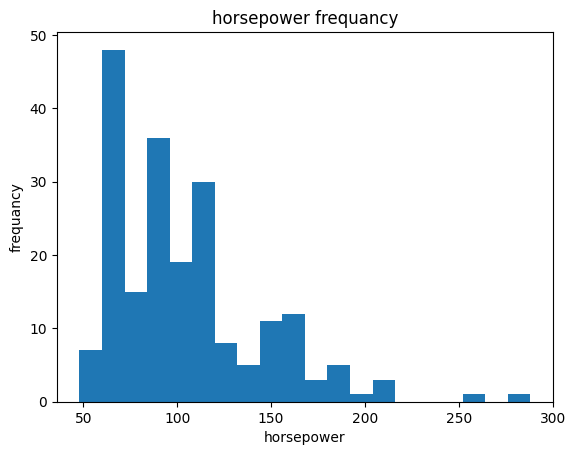

In [ ]:
plt.hist(car["horsepower"],bins=20)
plt.xlabel("horsepower")
plt.ylabel("frequancy")
plt.title("horsepower frequancy")

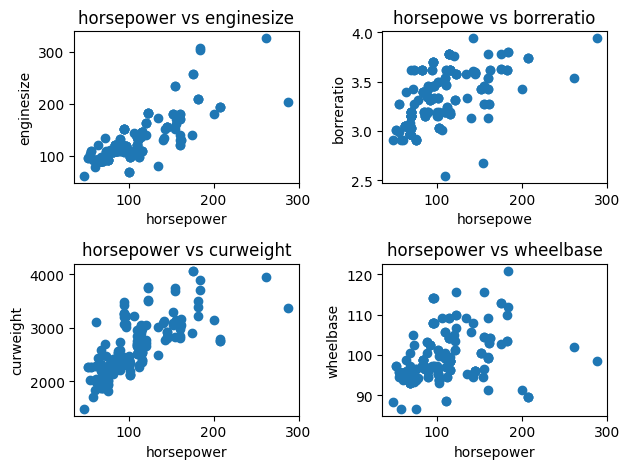

In [ ]:
plt.subplot(221)
plt.scatter(car["horsepower"],car["enginesize"])
plt.xlabel("horsepower")
plt.ylabel("enginesize")
plt.title("horsepower vs enginesize")

plt.subplot(222)
plt.scatter(car["horsepower"],car["boreratio"])
plt.xlabel("horsepowe")
plt.ylabel("borreratio")
plt.title('horsepowe vs borreratio')

plt.subplot(223)
plt.scatter(car["horsepower"],car["curbweight"])
plt.xlabel("horsepower")
plt.ylabel("curweight")
plt.title("horsepower vs curweight")

plt.subplot(224)
plt.scatter(car["horsepower"],car["wheelbase"])
plt.xlabel("horsepower")
plt.ylabel("wheelbase")
plt.title("horsepower vs wheelbase")
plt.tight_layout()

<Axes: xlabel='doornumber', ylabel='price'>

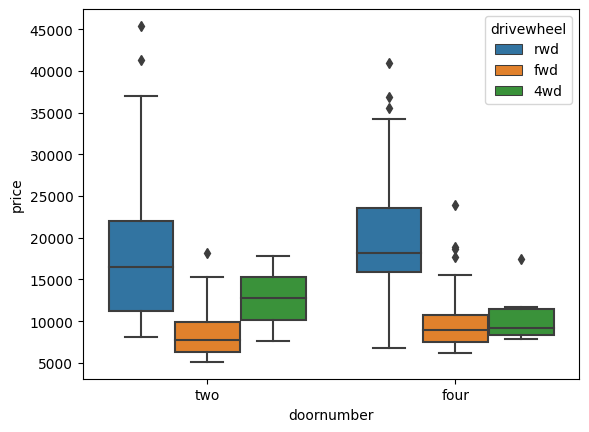

In [ ]:
sns.boxplot(x=car["doornumber"],y=car["price"],hue=car['drivewheel'])

In [ ]:
car["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

<Axes: xlabel='carbody', ylabel='symboling'>

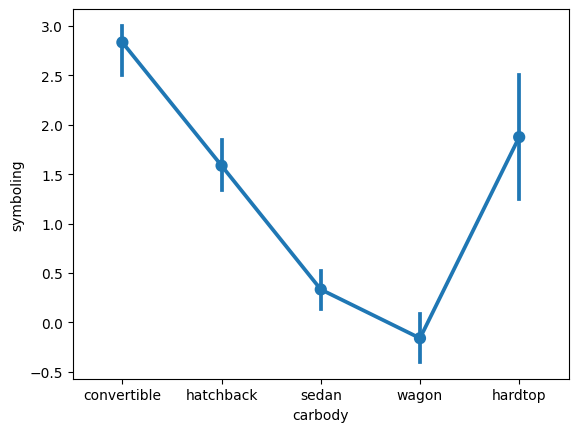

In [ ]:
sns.pointplot(x=car["carbody"],y=car["symboling"])

In [ ]:
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,3.47,111,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,2548,dohc,four,130,mpfi,3.47,111,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2823,ohcv,six,152,mpfi,2.68,154,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,2337,ohc,four,109,mpfi,3.19,102,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,2824,ohc,five,136,mpfi,3.19,115,18,22,17450.0


<BarContainer object of 205 artists>

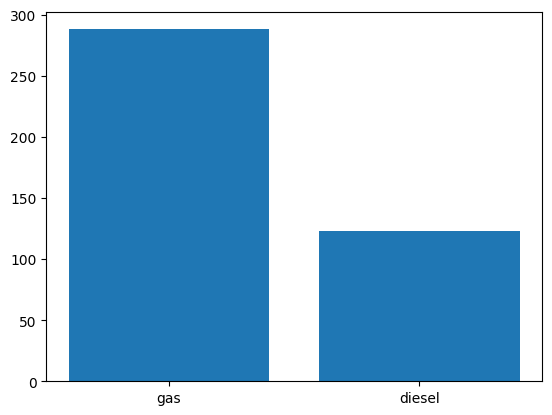

In [ ]:
plt.bar(car["fueltype"],car["horsepower"])


# DATA PREBAIR

In [ ]:
X= car.drop("price",axis=1)
Y= car["price"]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)


In [ ]:
print("the shape of X ",X.shape)
print("the shape of Y",Y.shape)
print("the shape of X_train",X_train.shape)
print("the shape of Y_train",y_train.shape)
print("the shape of X_test",X_test.shape)
print("the shape of Y_test",y_test.shape)

the shape of X  (205, 20)
the shape of Y (205,)
the shape of X_train (164, 20)
the shape of Y_train (164,)
the shape of X_test (41, 20)
the shape of Y_test (41,)


In [ ]:
datatype=X_train.dtypes
car_num=datatype[datatype!='object'].index.tolist()
car_cat=datatype[datatype=='object'].index.tolist()
X_train_num= X_train.drop(car_cat,axis=1)
X_test_num = X_test.drop(car_cat,axis=1)
X_train_cat=X_train[car_cat]
X_test_cat=X_test[car_cat]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown = 'ignore',sparse=False)
X_train_encoded=encoder.fit_transform(X_train_cat)
X_test_encoded=encoder.transform(X_test_cat)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_encoded_df= pd.DataFrame(X_train_encoded,columns=encoder.get_feature_names_out(X_train_cat.columns))
X_test_encoded_df=pd.DataFrame(X_test_encoded,columns=encoder.get_feature_names_out(X_test_cat.columns))

In [ ]:
X_train =pd.concat([X_train_num,X_train_encoded_df],axis=1)
X_test= pd.concat([X_test_num,X_test_encoded_df],axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_train = pd.DataFrame(imputer.fit_transform(X_train))
X_test=pd.DataFrame(imputer.transform(X_test))


# Training model

In [ ]:

from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
lin_pred=lin_reg.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
X_pre=lin_reg.predict(X_test)
lin_mse=mean_squared_error(y_test,lin_pred)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

6717.15442540011

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)
Tree_pred=tree_reg.predict(X_test)

In [ ]:
tree_mse=mean_squared_error(y_test,Tree_pred)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

3222.529612276246

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(X_train,y_train)
forest_pred=forest_reg.predict(X_test)


In [ ]:
forest_mse=mean_squared_error(y_test,forest_pred)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

1940.3764145582995

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score( forest_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores=np.sqrt(-scores)
forest_rmse_scores

array([2120.5330638 , 2372.13675269, 1552.9391916 , 1739.96038863,
       3510.82629264, 2953.37673644, 1819.61112963, 2302.94117227,
       2258.30387461, 4101.77479364])

In [ ]:
lin_scores=cross_val_score(lin_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)

In [ ]:
lin_rmse_scores

array([3384.29818674, 4892.68617043, 3779.93631733, 2984.1030353 ,
       3998.34582442, 5564.64193983, 4919.37788309, 5261.21153112,
       6585.94762885, 7405.31554142])

In [ ]:
dec_tree_scores=cross_val_score(tree_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
dec_tree_scores=np.sqrt(-dec_tree_scores)
dec_tree_scores

array([2175.69873834, 1917.77985917, 3584.02595677, 1981.32155837,
       3139.06255164, 4918.0486031 , 2922.41981284, 2925.47203456,
       1983.31726928, 4639.83508092])

In [ ]:
model_name=["linear_reg","Decision_tree","Random_forest"]

scores_mean=[lin_rmse_scores.mean(),dec_tree_scores.mean(),forest_rmse_scores.mean()]
scores_std=[lin_rmse_scores.std(),dec_tree_scores.std(),forest_rmse_scores.std()]

In [ ]:
model_results= pd.DataFrame({"model":model_name,"mean_scores":scores_mean,"std":scores_std})

In [ ]:
model_results

,model,mean_scores,std
0,linear_reg,4877.586406,1331.247138
1,Decision_tree,3018.698146,1032.399811
2,Random_forest,2473.240340,773.365937


**THANK** **YOU**